In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
data_df = pd.read_csv("data.csv", encoding='unicode-escape')
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [44]:
print(data_df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [45]:
delete_nulls = data_df.isna().sum() #getting all nulls
data_df = data_df.dropna() #deleting all nulls

data_df.columns = data_df.columns.str.lower() #everyhing in lower case

In [46]:
data_df['country'] = data_df['country'].astype('category').cat.codes #encode country as categorical
data_df['description'] = data_df['description'].str.replace('[w,s]', "",regex=True) #removing unnecessary characters

scaler = StandardScaler()
data_df[['quantity', 'unitprice']] = scaler.fit_transform(data_df[['quantity', 'unitprice']]) #normalizing numerical data

data_df = data_df.drop_duplicates() #removes duplicates from the dataset


In [47]:
data_df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.024373,12/1/2010 8:26,-0.013135,17850.0,35
1,536365,71053,WHITE METAL LANTERN,-0.024373,12/1/2010 8:26,-0.001017,17850.0,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.016331,12/1/2010 8:26,-0.010250,17850.0,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.024373,12/1/2010 8:26,-0.001017,17850.0,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.024373,12/1/2010 8:26,-0.001017,17850.0,35


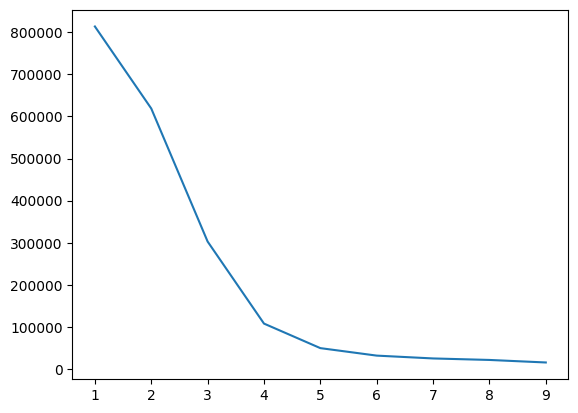

In [48]:
X = data_df[['quantity','unitprice']]
inertia= []
distortions = []
cluster_range = range(1,10)

for k in cluster_range:
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(cluster_range, inertia)
plt.show()

We should use the data relevant to what we are trying to figure out, in this case it is the customer segments, so columns such as Quantity, UnitPrice and CustomerID can be used for this. The ideal number of clusters is 4-5, which is where the curve happens. I used the elbow method with inertia to determine this.

In [49]:
data_sample = X.sample(n=1000, random_state=42)

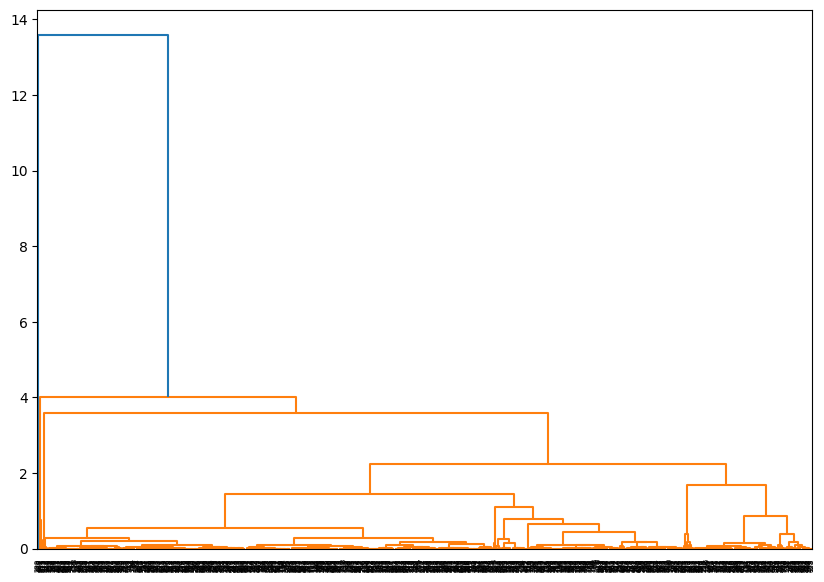

In [50]:
linked = linkage(data_sample, method='ward')

plt.figure(figsize=(10,7))
dendro=dendrogram(linked)

I think the results of the k-means are better suited for this dataset. Mainly because you can easily see how many clusters are necessary in a quick and simple way, which doesnt happen in the hierarchical clustering, probably because of the amount of data.